In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['cmex10',] # windows->simhei
plt.rcParams['figure.dpi'] = 100

import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(np.__version__)
print(pd.__version__)
print(mpl.__version__)

1.24.3
1.5.3
3.7.2


In [3]:
import matplotlib.pylab as pl
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split

import shap
import xgboost as xgb
# print the JS visualization code to the notebook
shap.initjs()

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV, cross_validate

In [5]:
import os
import platform
if platform.system() == "Windows":
    os.chdir(r'H:\BaiduSyncdisk\DR.MENG-Full\Y2024-002-DT-NANJING-ACCESSIBILITY-MAUP')
else:
    os.chdir(r'/Volumes/SANDISK/DR.MENG')

In [6]:
import joblib

# Data

In [7]:
# data = joblib.load('./data_factors_dump/modeling_od_pt_community_od_1800.joblib')
data = joblib.load('./data_factors_dump_new/modeling_od_cycle_community_od_900.joblib')

In [8]:
data.keys()

dict_keys(['name', 'df_1', 'df_2', 'df_3', 'df_4'])

In [9]:
data['df_1'].columns

Index(['net_id', 'diff_building_grid', 'name', 'park_id', 'area', 'angle',
       '50_larger', '50_park', 'larger_park', 'diff_distance', 'road', 'sts',
       'pop'],
      dtype='object')

In [10]:
data['df_1'].head()

,net_id,diff_building_grid,name,park_id,area,angle,50_larger,50_park,larger_park,diff_distance,road,sts,pop
0,1175274,0.575116,九龙湖公园,p_53,12.97,148.91,678.744,1999.494,1387.304,612.190,4.968,3.740,0.521
1,1175275,0.575116,九龙湖公园,p_53,12.97,152.96,690.973,2027.244,1387.304,639.940,4.943,3.661,0.527
2,1176132,0.580851,九龙湖公园,p_53,12.97,145.36,620.549,1930.354,1387.304,543.050,4.949,3.661,0.526
3,1176133,0.575116,九龙湖公园,p_53,12.97,149.86,629.945,1957.807,1387.304,570.503,4.896,3.740,0.530
4,1176134,0.575116,九龙湖公园,p_53,12.97,154.20,643.103,1986.139,1387.304,598.835,4.887,3.820,0.534


In [11]:
y_cols = ['diff_building_grid']
x_cols = [
    # 'area',
    'angle',
    '50_park',
    'larger_park',
    'diff_distance',
    ]

In [12]:
choose_varsx = data['df_1']

In [13]:
choose_varsx = choose_varsx[choose_varsx['diff_building_grid'] !=0]
choose_varsx

,net_id,diff_building_grid,name,park_id,area,angle,50_larger,50_park,larger_park,diff_distance,road,sts,pop
0,1175274,0.575116,九龙湖公园,p_53,12.97,148.91,678.744,1999.494,1387.304,612.190,4.968,3.740,0.521
1,1175275,0.575116,九龙湖公园,p_53,12.97,152.96,690.973,2027.244,1387.304,639.940,4.943,3.661,0.527
2,1176132,0.580851,九龙湖公园,p_53,12.97,145.36,620.549,1930.354,1387.304,543.050,4.949,3.661,0.526
3,1176133,0.575116,九龙湖公园,p_53,12.97,149.86,629.945,1957.807,1387.304,570.503,4.896,3.740,0.530
4,1176134,0.575116,九龙湖公园,p_53,12.97,154.20,643.103,1986.139,1387.304,598.835,4.887,3.820,0.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14437,2149712,-0.186098,平顶山公园,p_86,4.68,18.46,1040.018,1680.042,2633.963,-953.921,4.257,3.979,0.907
14438,2149713,-0.197413,平顶山公园,p_86,4.68,18.95,1089.196,1642.291,2633.963,-991.672,4.269,3.979,0.905
14439,2149714,-0.198712,平顶山公园,p_86,4.68,19.39,1138.446,1605.210,2633.963,-1028.753,4.272,3.979,0.909
14440,2149719,2.444716,平顶山公园,p_86,4.68,17.72,4348.458,1431.641,3595.611,-2163.970,4.289,4.059,0.900


In [14]:
label_y = y_cols[0]

In [15]:
choose_varsx['diff_building_grid'].describe()

count    13416.000000
mean         0.474556
std          6.822773
min        -26.974656
25%         -1.141218
50%          0.082481
75%          1.987384
max         22.359621
Name: diff_building_grid, dtype: float64

In [16]:
X,y = choose_varsx.loc[:,x_cols],choose_varsx.loc[:,label_y]

In [17]:
angle = 'Angle'
m50 = 'DIST_50grid_Park'
larger = 'DIST_UNgrid_Park'
diff = 'DIFF_Distance'

In [18]:
X = X.rename(columns={
'angle': f'{angle}_1', '50_park': f'{m50}_1', 'larger_park': f'{larger}_1', 'diff_distance': f'{diff}_1',
        })

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [20]:
# X

In [21]:
len(X_train), len(X_test)

(10062, 3354)

# xgboost

## bayes optim

In [22]:
from hyperopt import fmin, tpe, hp, Trials
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# object function
def objective(params):
    params = {
        'learning_rate': params['learning_rate'],
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth'])
    }
    model = xgb.XGBRegressor(**params)
    score = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score

# params
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 1),
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'max_depth': hp.quniform('max_depth', 2, 10, 1)
}

# bayes
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)


print("Best parameters found: ", best)

100%|██████████████████████████████████████████████| 100/100 [03:15<00:00,  1.96s/trial, best loss: 3.7049606286813663]
Best parameters found:  {'learning_rate': 0.259978876070521, 'max_depth': 9.0, 'n_estimators': 215.0}


In [23]:
def get_best(best):
    dic  = {}
    for k, v in best.items():
        if k == 'max_depth' or k == 'n_estimators':
            v = int(v)
        else:
            v = round(v, 2)
        dic[k] = v
            
    return dic

In [24]:
best = get_best(best)
best

{'learning_rate': 0.26, 'max_depth': 9, 'n_estimators': 215}

In [25]:
reg = xgboost.XGBRegressor(**best)

In [26]:
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.26, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=215, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
pred = reg.predict(X_test)
r2 = r2_score(pred, y_test).round(3)
mse = mean_squared_error(pred, y_test).round(3)
print(r2, mse)

0.917 3.439


# shap

In [30]:
reg = joblib.load('./data_models/xgboost_models_new/df_1_modeling_od_walk_community_od_1800.joblib')

In [31]:
reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.12, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=246, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
import shap
shap.initjs()

In [33]:
explainer = shap.Explainer(reg, X)
shap_values = explainer(X)

 99%|===================| 13251/13416 [01:10<00:00]        

In [34]:
# shap_values

Text(0.5, 0, 'mean(|SHAP values|)')

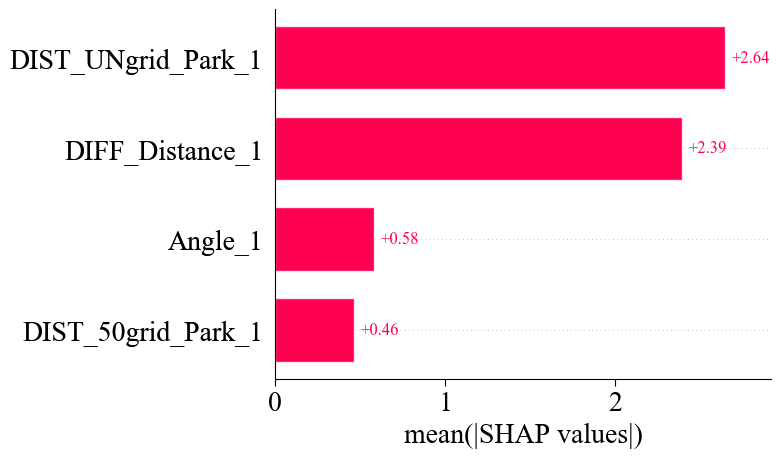

In [51]:
fig, ax = plt.subplots()
shap.plots.bar(shap_values, show=False, ax=ax, max_display=4)
ax.tick_params(axis='both', which='major', length=5, color='k', labelsize=20)
ax.set_xlabel('mean(|SHAP values|)', fontsize=20)
# ax.set_title('modeling_od_cycle_community_od_900\n',loc='left')

In [39]:
shap_values

.values =
array([[ 1.49764072, -0.50581806, -0.9549361 ,  3.60011607],
       [ 1.42113545, -0.27118229, -1.04866161,  3.58744654],
       [ 1.55043933, -0.50744592, -0.98055809,  3.63424268],
       ...,
       [-0.03049182,  0.02388703, -3.46533955, -1.85019493],
       [ 0.39627899,  0.09300474,  7.69797326, -5.93591791],
       [ 0.33954419,  0.06335054,  7.688705  , -5.87427543]])

.base_values =
array([-1.14231384, -1.14231384, -1.14231384, ..., -1.14231384,
       -1.14231384, -1.14231384])

.data =
array([[  148.91 ,  1999.494,  1387.304,   612.19 ],
       [  152.96 ,  2027.244,  1387.304,   639.94 ],
       [  145.36 ,  1930.354,  1387.304,   543.05 ],
       ...,
       [   19.39 ,  1605.21 ,  2633.963, -1028.753],
       [   17.72 ,  1431.641,  3595.611, -2163.97 ],
       [   17.07 ,  1399.705,  3595.611, -2195.906]])

In [40]:
shap_importance = pd.DataFrame(np.abs(shap_values.data).mean(0), columns=['SHAP Importance'])
shap_importance

,SHAP Importance
0,52.518963
1,1430.043048
2,1853.755236
3,692.668967


In [42]:
shap_importance['Feature'] = X.columns
shap_importance = shap_importance.sort_values(by='SHAP Importance', ascending=False).reset_index(drop=True)

In [43]:
shap_importance

,SHAP Importance,Feature
0,1853.755236,DIST_UNgrid_Park_1
1,1430.043048,DIST_50grid_Park_1
2,692.668967,DIFF_Distance_1
3,52.518963,Angle_1


In [44]:
shap_importance['SHAP Importance'] / shap_importance['SHAP Importance'].sum()

0    0.460105
1    0.354939
2    0.171921
3    0.013035
Name: SHAP Importance, dtype: float64

<Axes: xlabel='SHAP value (impact on model output)'>

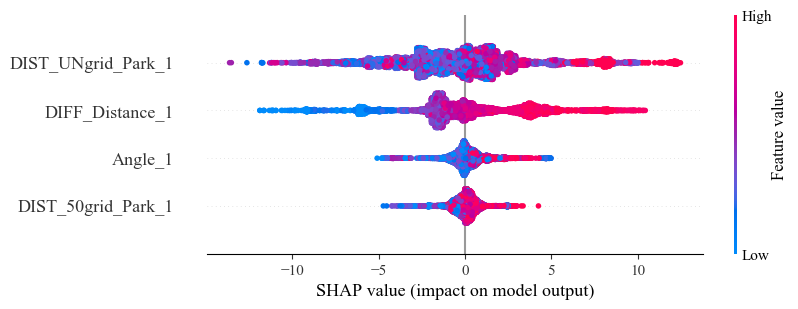

In [52]:
shap.plots.beeswarm(shap_values,show=False)

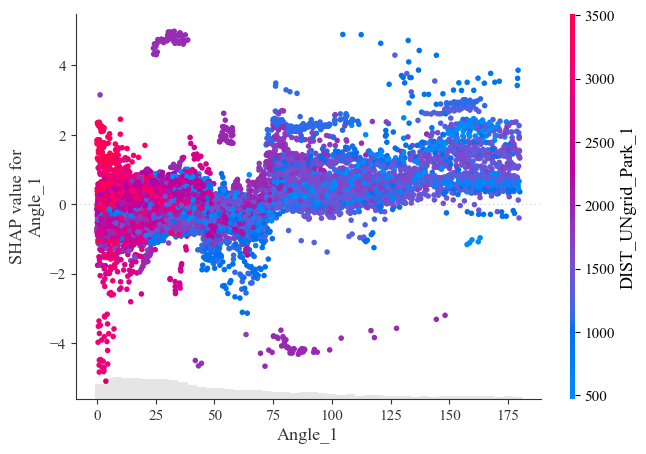

In [53]:
shap.plots.scatter(shap_values[:, f"{angle}_1"], color=shap_values[:, f"{larger}_1"])

Text(0.0, 1.0, 'modeling_od_cycle_community_od_900\n')

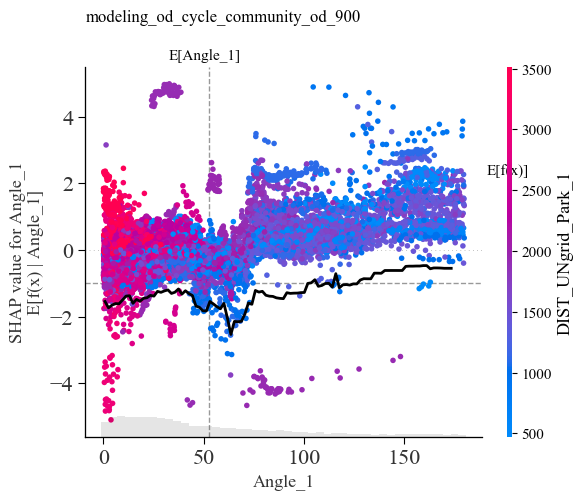

In [98]:
fig, ax = shap.partial_dependence_plot(
    f"{angle}_1",
    reg.predict,
    X,
    xmin='percentile(1)', xmax='percentile(99)',
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    hist=False,
    ice=False,
    # shap_values=shap_values[sample_ind : sample_ind + 1, :],,
)
ax.lines[0].set_color('k')  # PDP曲线颜色

shap.plots.scatter(shap_values[:, f"{angle}_1"], color=shap_values[:, f"{larger}_1"], ax=ax, show=False)
ax.set_ylabel(f'SHAP value for {angle}_1\nE[f(x) | {angle}_1]')
ax.set_xlabel(f'{angle}_1')
ax.tick_params(axis='both', which='major', length=5, color='k', labelsize=16)

ax.set_title('modeling_od_cycle_community_od_900\n',loc='left')

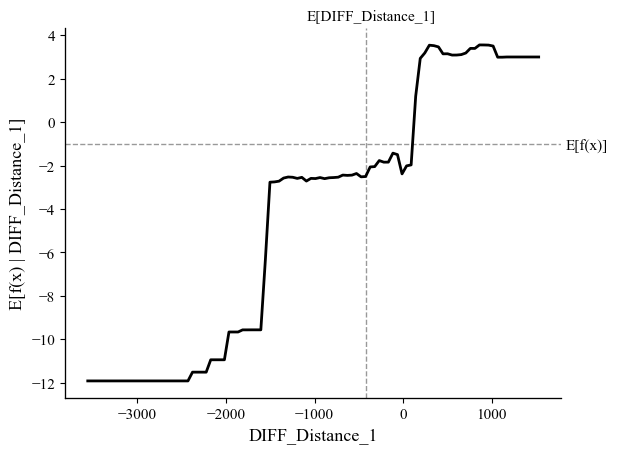

In [90]:
fig, ax = shap.partial_dependence_plot(
    f"{diff}_1",
    reg.predict,
    X,
    xmin='percentile(0.05)', xmax='percentile(99.95)',
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    hist=False,
    ice=False,
    # shap_values=shap_values[sample_ind : sample_ind + 1, :],,
)
ax.lines[0].set_color('k')  # PDP曲线颜色
# ax.set_title('modeling_od_cycle_community_od_900\n',loc='left')
# shap.plots.scatter(shap_values[:, f"{diff}_1"], ax=ax)


In [64]:
shap_interaction_values3 = shap.TreeExplainer(reg).shap_interaction_values(X)

In [65]:
X.head(1)

,Angle_1,DIST_50grid_Park_1,DIST_UNgrid_Park_1,DIFF_Distance_1
0,148.91,1999.494,1387.304,612.19


Text(0.0, 1.0, 'modeling_od_cycle_community_od_900\n')

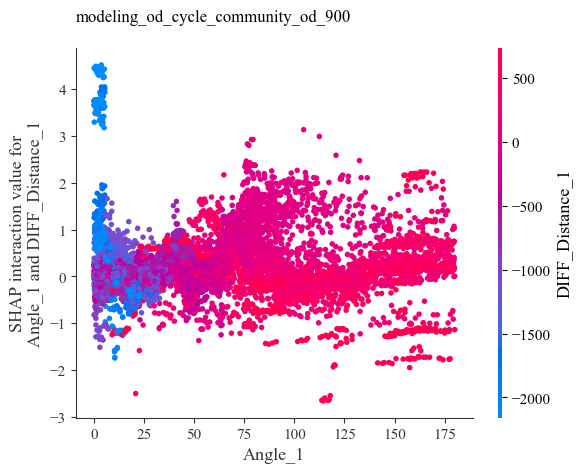

In [66]:
fig, ax = plt.subplots()
shap.dependence_plot(('Angle_1',f'{diff}_1'), shap_interaction_values3, X, show=False, ax=ax)
ax.set_title('modeling_od_cycle_community_od_900\n',loc='left')
# ax.hlines(0,-30000,10000,ls='--',color='k',lw=0.5,alpha=0.7)
# ax.vlines(0,-3,3,ls='--',color='k',lw=0.5,alpha=0.7)

In [ ]:
"""
./Py/S02-models-and-shap-Explainer.py to process all data.
"""